<a href="https://colab.research.google.com/github/Shanumukareddy/DATA-MINING/blob/main/lab10(dm).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Task 1: Modify Dataset
• Change X = iris.data[:, :2] to include different features.
• See how it affects the decision boundary.

In [2]:
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data[:, :2]


In [3]:
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

In [4]:
# Load dataset
iris = datasets.load_iris()
X = iris.data[:, 2:4]
y = (iris.target != 0)

In [5]:
# Fit model
model = LogisticRegression()
model.fit(X, y)

LogisticRegression()

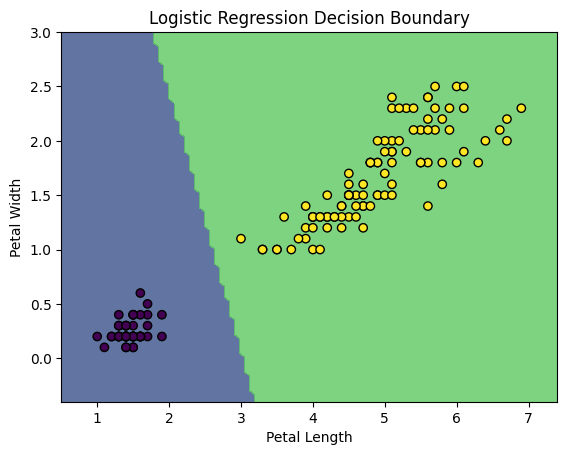

In [6]:
# Plot decision boundary
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                     np.linspace(y_min, y_max, 100))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.title('Logistic Regression Decision Boundary')
plt.show()

Task 2: Apply Logistic Regression to Another Dataset
• Use the Titanic dataset or Breast Cancer dataset.
• Preprocess the dataset (handle missing values, encode categorical variables).
• Train and evaluate a Logistic Regression model.

In [7]:
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report

In [8]:
# Load data
data = load_breast_cancer()
X, y = data.data, data.target


In [9]:
# Preprocessing
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [10]:
# Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [11]:
# Train
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [12]:
# Evaluate
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.95      0.96        43
           1       0.97      0.99      0.98        71

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



Task 3: Modify Model Parameters
• Try changing solver='liblinear' or penalty='l1'.
• Observe how the model behaves with different hyperparameters.


In [13]:
model = LogisticRegression(solver='liblinear', penalty='l1')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Accuracy with L1 penalty:", model.score(X_test, y_test))

Accuracy with L1 penalty: 0.9736842105263158
